In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("dataframe_.csv")
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [3]:
df_new = df[np.isfinite(df).all(1)]

In [4]:
df_new.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [5]:
df_new['output'].describe()

count    1696.000000
mean      -34.088017
std        65.771112
min      -132.422167
25%       -80.026767
50%       -50.470981
75%       -11.000000
max       134.425495
Name: output, dtype: float64

In [6]:
X = df_new['input'].values.reshape(-1,1)
y = df_new['output'].values.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train
y_train

array([[ -65.45754549],
       [  86.75781924],
       [  94.79950464],
       ...,
       [-132.422167  ],
       [  86.00624836],
       [-127.0636111 ]])

In [9]:
X_test
y_test

array([[ -81.76071102],
       [ -51.66513308],
       [ -57.31872135],
       [ 107.        ],
       [ -25.28470337],
       [  80.3365181 ],
       [ -68.74341962],
       [-112.8431645 ],
       [ -18.31251762],
       [ -45.33323821],
       [ -95.        ],
       [  90.47212182],
       [   1.21625178],
       [ -73.48791167],
       [ -59.11962969],
       [ -63.41746806],
       [ -72.42753461],
       [ -44.03772921],
       [  18.03833636],
       [ 125.6857499 ],
       [ -65.22934947],
       [ -89.        ],
       [ -55.01953723],
       [ -44.        ],
       [ -65.22934947],
       [ -95.87848863],
       [-101.        ],
       [ -46.07263753],
       [  29.        ],
       [  -5.02330607],
       [ -67.20442906],
       [ -19.53037002],
       [ -61.16787001],
       [ -99.43907611],
       [ -48.        ],
       [ -44.9074473 ],
       [  -9.99646719],
       [ -46.96889125],
       [  41.36624334],
       [ -31.76552378],
       [ -39.63667139],
       [-100.   

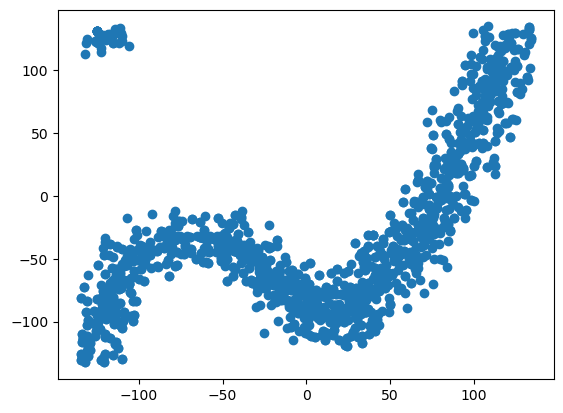

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
(df_new['input']/df_new['output']).describe()

count    1696.000000
mean       -0.489992
std        27.580258
min      -765.575392
25%        -0.291892
50%         0.786176
75%         1.520049
max        99.960104
dtype: float64

In [12]:
df_new=df_new[((df_new['input']/df_new['output'])>= 3)]
df_new.describe()

,input,output
count,109.000000,109.000000
mean,41.531536,5.125921
std,76.777299,19.198265
min,-120.470418,-38.589729
25%,-38.257448,-12.132221
50%,80.633331,10.035901
75%,89.633331,21.000000
max,112.624910,30.205428


In [13]:
def remove_outliers_z_score(data):
    z_scores = stats.zscore(data)
    return data[(z_scores < 3).all(axis=1)]
data =  np.array(df_new)
filtered_data = remove_outliers_z_score(data)
filtered_data

array([[ -87.0241036 ,  -28.31035086],
       [-101.6487395 ,  -27.36712757],
       [ -76.35324445,  -19.81154525],
       [ -63.38650606,  -20.97513743],
       [ -76.55524121,  -23.92997877],
       [ -68.3758247 ,  -18.31251762],
       [  82.89604966,    1.46798085],
       [  84.6333313 ,    7.        ],
       [  84.77524438,    8.75598497],
       [  72.04171715,   11.947285  ],
       [  89.6333313 ,   18.        ],
       [  76.65852087,   22.91589129],
       [  92.6333313 ,   25.        ],
       [  93.54570014,   20.76041535],
       [  90.57672233,   18.03833636],
       [ 101.2707346 ,   27.90016191],
       [ 100.4674643 ,   23.41974153],
       [  58.9160873 ,    5.15080161],
       [  71.03641899,    7.10777175],
       [  74.34604263,   10.03590062],
       [  66.88622905,   12.87885513],
       [  80.6333313 ,    5.        ],
       [  94.82477999,    1.21625178],
       [  82.6333313 ,   13.        ],
       [  73.46537222,    1.49373122],
       [  84.6333313 ,   

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
r_sq = regressor.score(X, y)
r_sq #coefficient of determination

0.2615013573514504

In [16]:
regressor.intercept_

array([-34.60619011])

In [17]:
regressor.coef_

array([[0.44296264]])

In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([[-2.13699052e+01],
       [-5.71529309e+01],
       [-4.96689588e+01],
       [ 1.75009813e+01],
       [-4.10719396e-01],
       [ 1.41795880e+01],
       [-3.79668303e+01],
       [-2.95150569e+01],
       [-6.48941262e+01],
       [-6.50180897e+01],
       [-2.72382457e+01],
       [ 2.06436076e+01],
       [ 7.39764514e+00],
       [-2.14628267e+01],
       [-4.67747002e+01],
       [-4.20888489e+01],
       [-9.35779379e+01],
       [-7.59109895e+01],
       [ 5.51591429e+00],
       [ 1.37145267e+01],
       [-4.68727952e+01],
       [-8.88100532e+01],
       [-4.52352650e+01],
       [-7.41922859e+01],
       [-4.68727952e+01],
       [-2.13706225e+01],
       [-9.10248664e+01],
       [-4.76256099e+01],
       [ 4.65506466e+00],
       [-4.86235902e+00],
       [-8.47996656e+01],
       [-6.42377976e+00],
       [-3.87664805e+01],
       [-8.47842622e+01],
       [-7.74788937e+00],
       [-7.03052564e+00],
       [ 8.79671064e-02],
       [-4.78099047e+01],
       [ 1.0

In [19]:
X_new = np.arange(5).reshape((-1, 1))
X_new

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [20]:
y_new = regressor.predict(X_new)
y_new

array([[-34.60619011],
       [-34.16322746],
       [-33.72026482],
       [-33.27730217],
       [-32.83433953]])

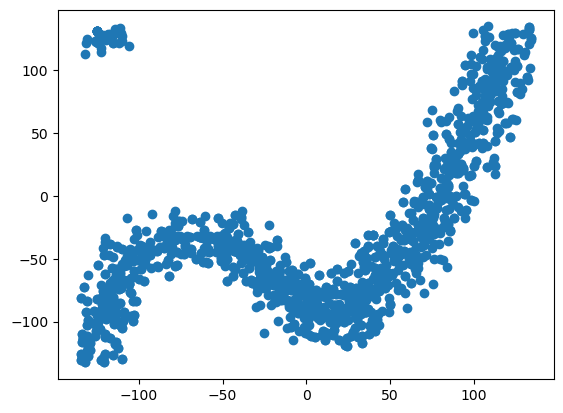

In [21]:
plt.scatter(X, y)
plt.show()